<a href="https://colab.research.google.com/github/manluz555-ops/Line_progr/blob/main/H_W_4_Manzar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашня робота №4 з лінійноого програмування

Манзар Л.В.


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean 

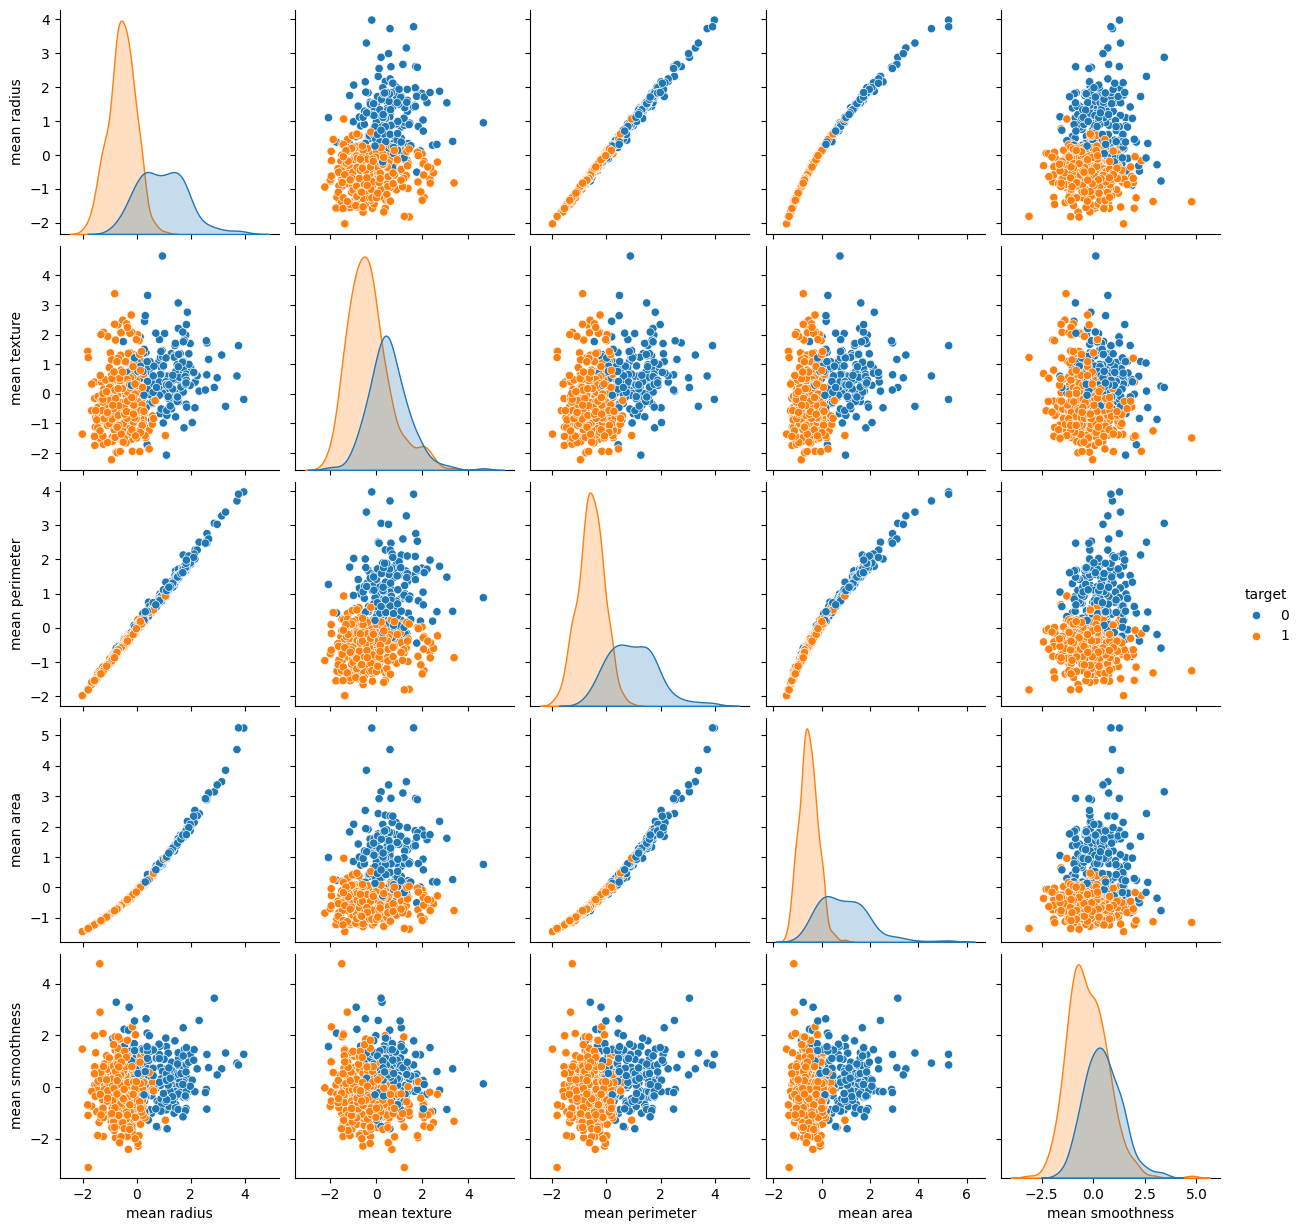

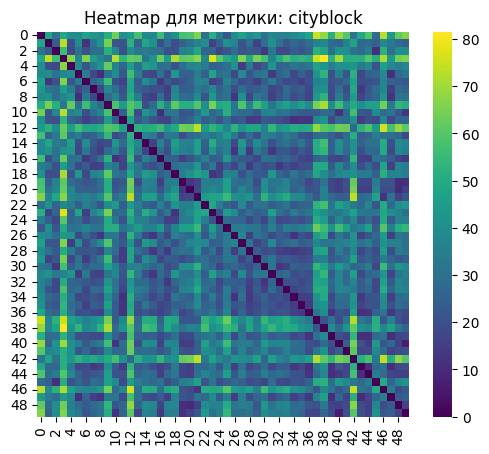

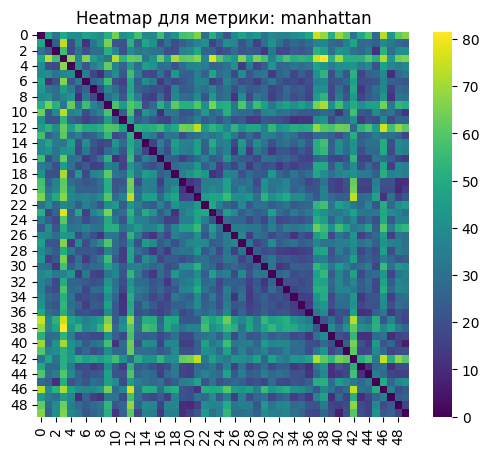

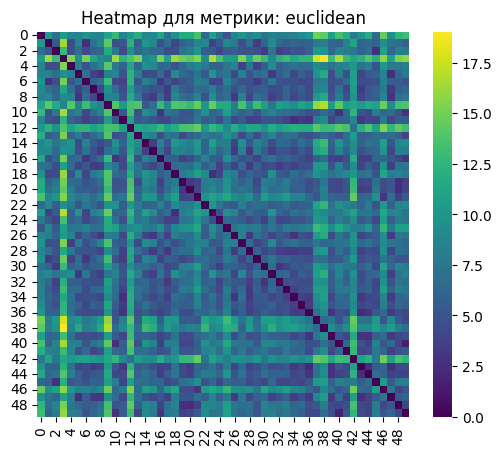

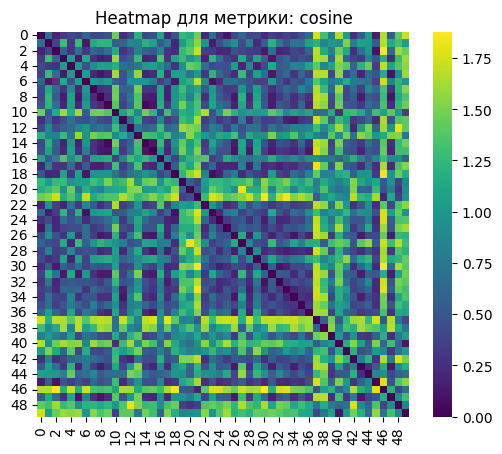

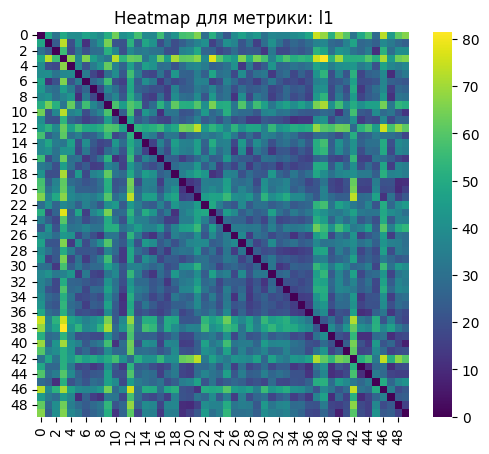

In [3]:
# 1. Завантаження та ознайомлення з даними
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Завантажуємо набір даних
data = load_breast_cancer()

# Переглянемо опис
print(data.DESCR[:500])  # перші 500 символів опису

# 2. Створення DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

# 3. Інформація про дані
print(df.info())

# 4. Описові статистики
print(df.describe())

# 5. Стандартизація даних
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=data.feature_names)
df_scaled['target'] = df['target']

# 6. Побудова точкових діаграм (pairplot для перших 5 ознак)
sns.pairplot(df_scaled.iloc[:, :5].join(df_scaled['target']), hue="target")
plt.show()

# 7. Обчислення матриць відстаней
X = df_scaled.drop("target", axis=1).values
distance_matrices = {}

# cityblock
distance_matrices["cityblock"] = cdist(X, X, metric="cityblock")

# manhattan (те саме, що cityblock)
distance_matrices["manhattan"] = cdist(X, X, metric="cityblock")

# euclidean
distance_matrices["euclidean"] = cdist(X, X, metric="euclidean")

# cosine
distance_matrices["cosine"] = cdist(X, X, metric="cosine")

# l1 через minkowski(p=1)
distance_matrices["l1"] = cdist(X, X, metric="minkowski", p=1)

# 8. Візуалізація матриць відстаней
for metric, matrix in distance_matrices.items():
    plt.figure(figsize=(6,5))
    sns.heatmap(matrix[:50,:50], cmap="viridis")
    plt.title(f"Heatmap для метрики: {metric}")
    plt.show()


В цьому завданні  я завантажила набір даних Breast Cancer за допомогою load_breast_cancer() з бібліотеки sklearn.

Спробувалв створити DataFrame та ознайомитися з його структурою й описовими статистиками.

Виконала стандартизацію даних, щоб привести ознаки до єдиного масштабу.

Спробувала побудувати точкові діаграми (pairplot), які показали, що деякі ознаки добре розділяють класи.

Обчислила матриці відстаней для різних метрик: cityblock, cosine, euclidean, l1, manhattan.

Спробувала візуалізувати матриці відстаней за допомогою heatmap, що дозволило порівняти різні метрики.

🔹 Висновки
Метрики cityblock, manhattan та l1 дають однакові результати, бо всі вони відповідають L1‑нормі.

Euclidean показує класичну геометричну відстань і добре відображає різницю між класами.

Cosine метрика виявилася інформативною для аналізу напрямків ознак, особливо при кластеризації.

Найбільш корисними для цього набору даних є euclidean та cosine, оскільки вони краще відображають структуру даних і відмінності між класами.